In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_dir = r"C:/Users/marreddyGowthamreddy/Downloads/PlantVillage"

In [5]:
image_size = (128, 128)
batch_size = 32

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

In [11]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 16516 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


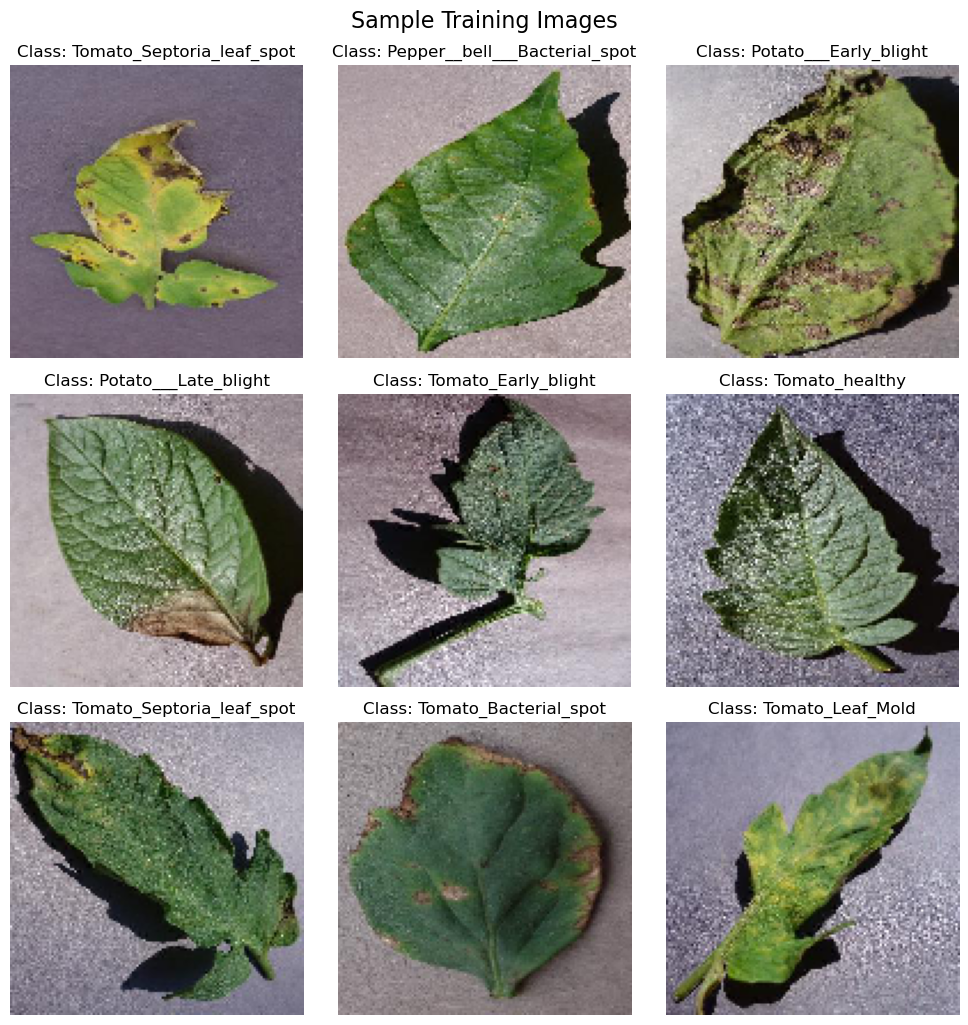

In [13]:
def plot_sample_images(generator):
    class_labels = list(generator.class_indices.keys())
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f"Class: {class_labels[np.argmax(labels[i])]}")
        plt.axis('off')
    plt.tight_layout()
    plt.suptitle("Sample Training Images", fontsize=16, y=1.02)
    plt.show()

plot_sample_images(train_gen)

In [15]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(*image_size, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\marreddyGowthamreddy\.ipython\New folder\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │           1,935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,394,255 (28.21 MB)

 Trainable params: 7,394,255 (28.21 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen
)

C:\Users\marreddyGowthamreddy\.ipython\New folder\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 389s 747ms/step - accuracy: 0.3513 - loss: 2.1124 - val_accuracy: 0.6827 - val_loss: 0.9815
Epoch 2/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 232s 448ms/step - accuracy: 0.6521 - loss: 1.0510 - val_accuracy: 0.7846 - val_loss: 0.6848
Epoch 3/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 234s 453ms/step - accuracy: 0.7412 - loss: 0.7681 - val_accuracy: 0.8241 - val_loss: 0.5193
Epoch 4/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 236s 456ms/step - accuracy: 0.7866 - loss: 0.6197 - val_accuracy: 0.8404 - val_loss: 0.4654
Epoch 5/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 238s 460ms/step - accuracy: 0.8178 - loss: 0.5320 - val_accuracy: 0.8646 - val_loss: 0.3989
Epoch 6/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 311s 602ms/step - accuracy: 0.8401 - loss: 0.4353 - val_accuracy: 0.8675 - val_loss: 0.3809
Epoch 7/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 229s 443ms/step - accuracy: 0.8634 - loss: 0.3835 - val_accuracy: 0.8797 - val_loss: 0.3600
Epoch 8/10
517/517 ━━━━━━━━━━━━━━━━━━━━ 211s 407ms/step - accuracy: 0.8872 -